In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\surya\Downloads\book.csv")

In [4]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [5]:
df1 = df.copy()

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


In [7]:
df1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [8]:
df1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

### Creating Transaction Encoder

In [9]:
te = TransactionEncoder()

In [10]:
te_ary = te.fit(df1).transform(df1)

In [11]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

In [12]:
ap

,A,B,C,D,F,G,I,R,Y,a,...,h,i,k,l,n,o,r,s,t,u
0,False,True,True,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,...,True,False,True,False,False,True,False,True,True,True
2,False,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
3,False,True,False,True,False,False,True,False,True,False,...,False,False,True,False,False,True,False,True,True,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


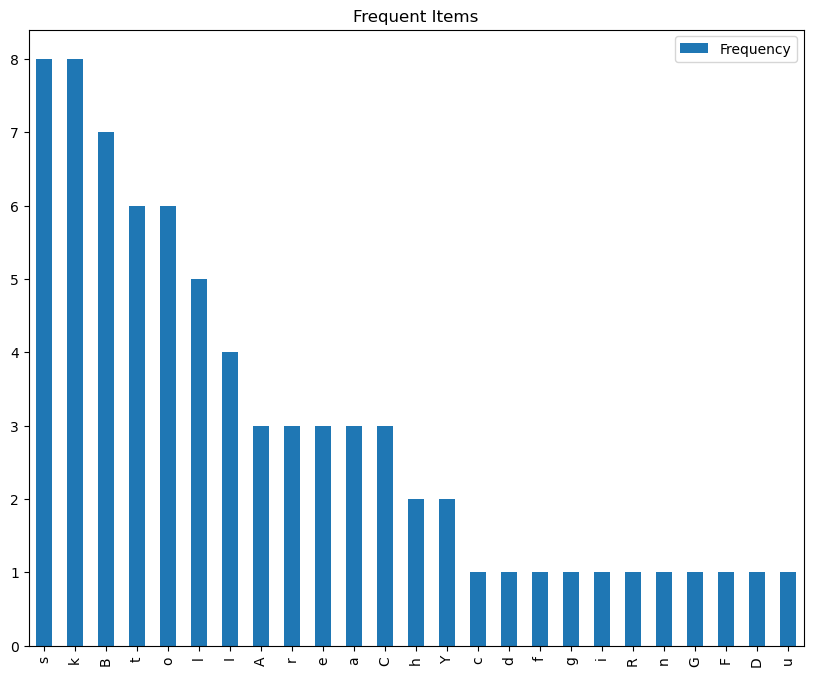

In [13]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False).plot(kind='bar',figsize=(10,8),title="Frequent Items")
plt.show()

In [14]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [15]:
#testing for different confidence levels
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [16]:
# Function for calculating the frequency sets for different support and confidence
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [17]:
confs=[]
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)  #returns the sets based on the support and confidence 

In [25]:
all_conf = pd.concat(confs,axis=1)
all_conf

,Support: 0.001,Support: 0.005,Support: 0.01,Support: 0.05,Support: 0.1
0.1,110800,26603,9079,662,100
0.2,75765,20533,7156,599,100
0.3,54271,15735,5532,478,89
0.4,41693,11771,4285,371,70
0.5,32173,8981,3272,260,49
0.6,21440,5582,2179,135,30
0.7,12983,3818,1459,87,19
0.8,9918,2750,1004,62,6
0.9,7409,1657,563,10,1


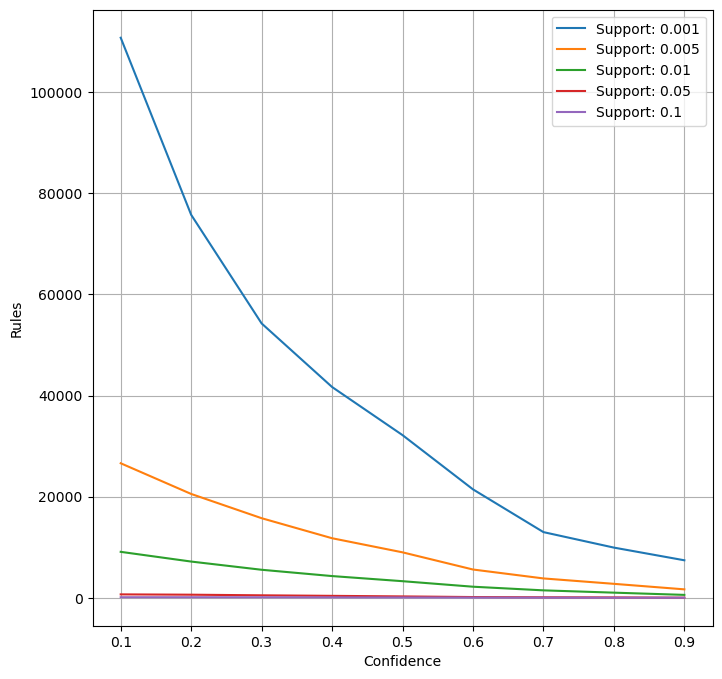

In [19]:
#plotting the graph for rules and confidence
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

So for the lower confidence higher the rules.

Based on the above statement we try to build a model which is having less support

## Creating Final Model

In [20]:
ap_final =  apriori(ap,0.001,True)

In [21]:
rules_final = association_rules(ap_final,min_threshold=.4,support_only=False)

In [22]:
rules_final[rules_final['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940,0.998498
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955,0.999249
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955,0.999249
5,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925,0.997747
6,(r),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955,0.999249
...,...,...,...,...,...,...,...,...,...,...
742,"(t, B)","(o, k, s, Y)",0.0015,0.0010,0.001,0.666667,666.666667,0.000999,2.9970,1.000000
743,"(B, Y)","(o, k, t, s)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf,1.000000
744,"(t, Y)","(o, k, s, B)",0.0010,0.0020,0.001,1.000000,500.000000,0.000998,inf,0.998999
746,"(s, Y)","(o, k, t, B)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf,1.000000


In [23]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

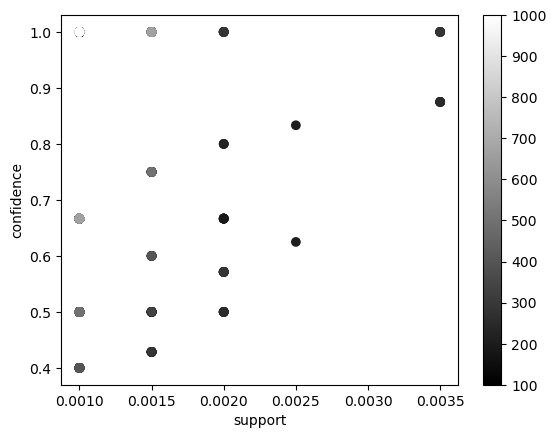

In [27]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")
plt.show()

We can observe that the support and confidence level are positively correlated and we can also observe that they are not linear.